### BiLSTM Model to predict Dublin Bikes Availability 

In [58]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import RobustScaler

#### Dataset

In [47]:
df = pd.read_csv('dublinbikes_20190101_20190401.csv' , parse_dates=['TIME'],index_col="TIME" )

In [48]:
df.head(1)

,STATION ID,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
TIME,,,,,,,,,,
2019-01-01 00:00:03,1,2018-12-31 23:50:05,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501


In [49]:
df_group = df.groupby(['TIME']).sum()

In [50]:
df_group['hour'] = df_group.index.hour
df_group['day_of_month'] = df_group.index.day
df_group['day_of_week'] = df_group.index.dayofweek
df_group['month'] = df_group.index.month

In [118]:
df_group.head(2)

,STATION ID,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,LATITUDE,LONGITUDE,hour,day_of_month,day_of_week,month
TIME,,,,,,,,,,
2019-01-01 00:00:03,6650,3654,2303,1290,6081.387343,-714.182209,0,1,1,1
2019-01-01 00:05:03,6650,3654,2305,1288,6081.387343,-714.182209,0,1,1,1


In [51]:
X1 = df_group.index
X2 = df_group.iloc[:,3]

In [107]:
df_group.index

DatetimeIndex(['2019-01-01 00:00:03', '2019-01-01 00:05:03',
               '2019-01-01 00:10:02', '2019-01-01 00:15:02',
               '2019-01-01 00:20:01', '2019-01-01 00:25:02',
               '2019-01-01 00:30:02', '2019-01-01 00:35:01',
               '2019-01-01 00:40:02', '2019-01-01 00:45:02',
               ...
               '2019-03-31 23:10:04', '2019-03-31 23:15:03',
               '2019-03-31 23:20:03', '2019-03-31 23:25:02',
               '2019-03-31 23:30:03', '2019-03-31 23:35:03',
               '2019-03-31 23:40:03', '2019-03-31 23:45:02',
               '2019-03-31 23:50:04', '2019-03-31 23:55:03'],
              dtype='datetime64[ns]', name='TIME', length=25719, freq=None)

#### Plotting the Actual data visualization

In [52]:
rcParams['figure.figsize'] = 22, 10

<AxesSubplot:xlabel='TIME', ylabel='AVAILABLE BIKES'>

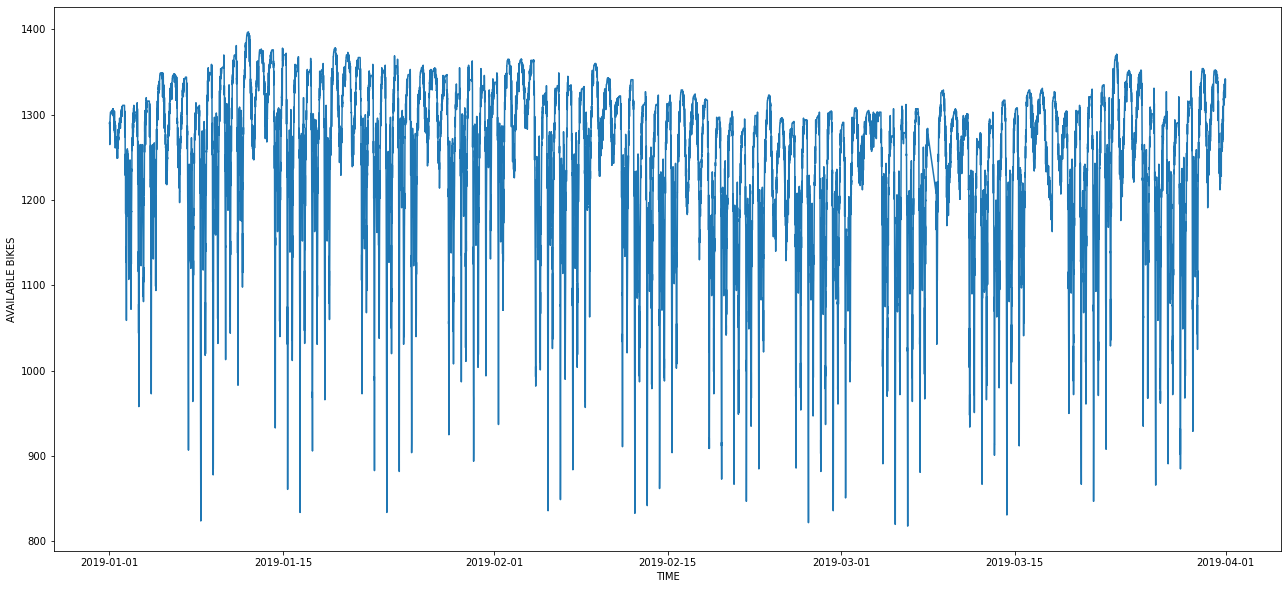

In [57]:
sns.lineplot(x=df_group.index, y=X2,data = df_group)

### Data Visualization hourly basis

<AxesSubplot:xlabel='TIME', ylabel='AVAILABLE BIKES'>

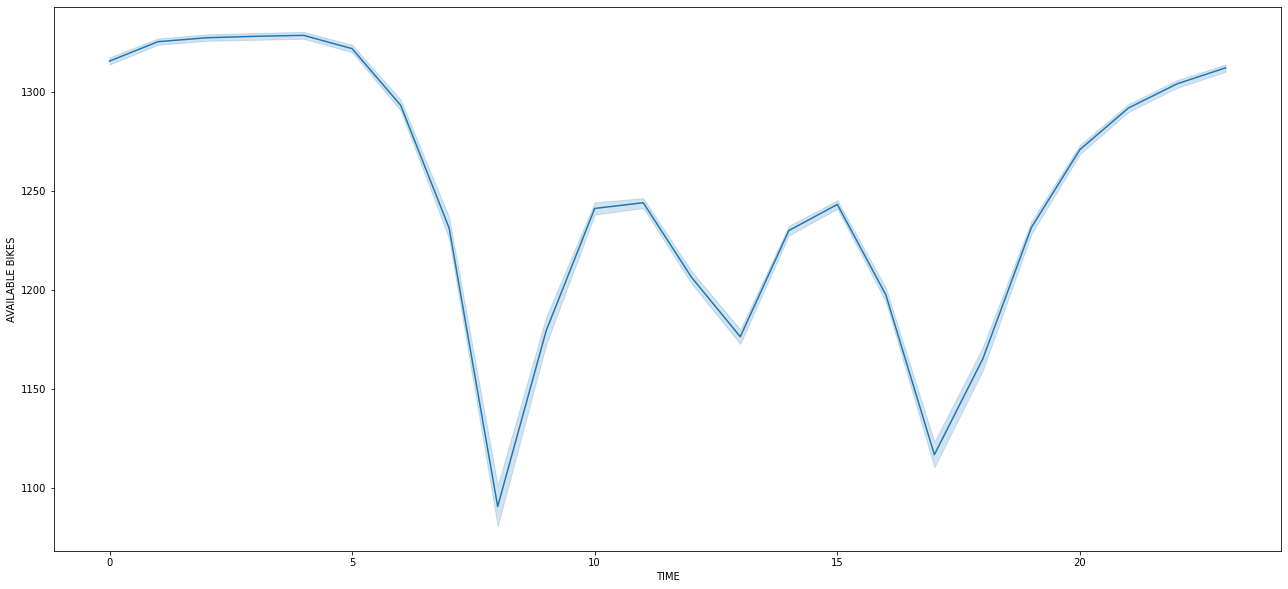

In [127]:
sns.lineplot(x=df_group.index.hour, y=X2,data = df_group)

### Data Visualization day basis

<AxesSubplot:xlabel='TIME', ylabel='AVAILABLE BIKES'>

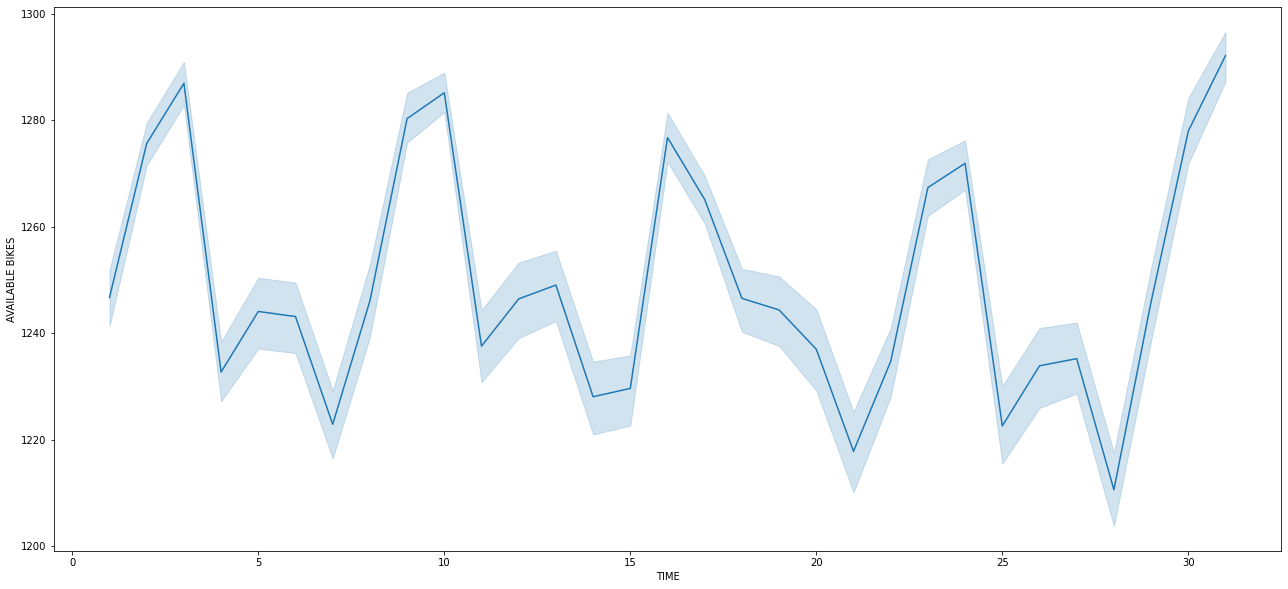

In [128]:
sns.lineplot(x=df_group.index.day, y=X2,data = df_group)

### Data Visualization day of the week basis

<AxesSubplot:xlabel='TIME', ylabel='AVAILABLE BIKES'>

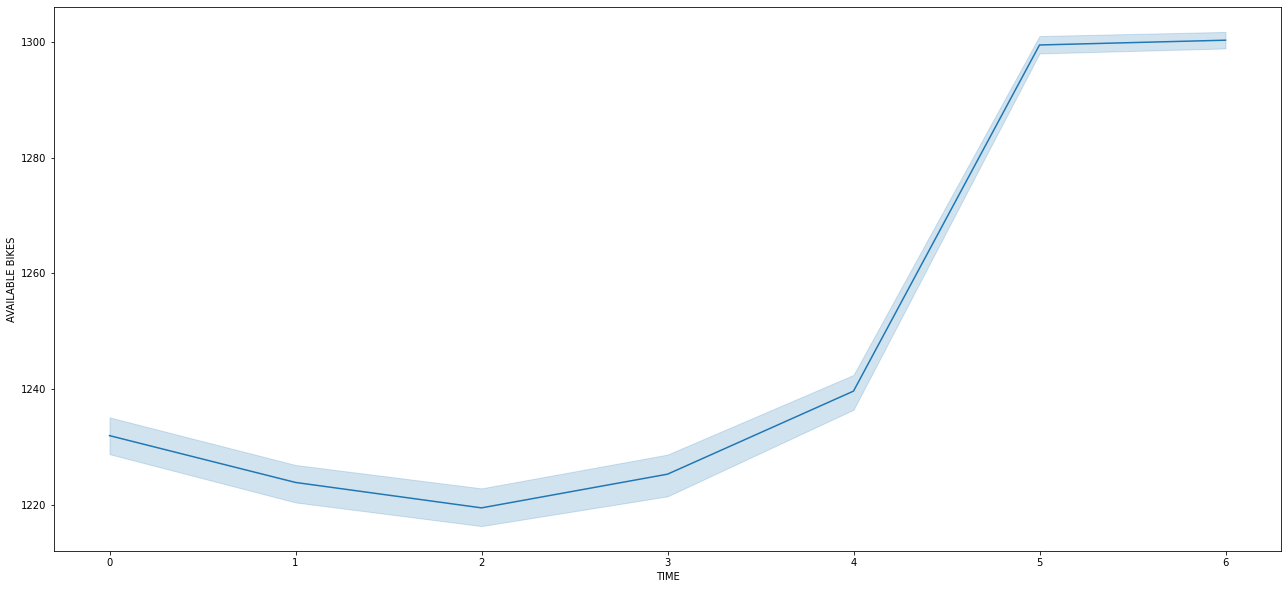

In [129]:
sns.lineplot(x=df_group.index.dayofweek, y=X2,data = df_group)

### Data Visualization Monthly basis

<AxesSubplot:xlabel='TIME', ylabel='AVAILABLE BIKES'>

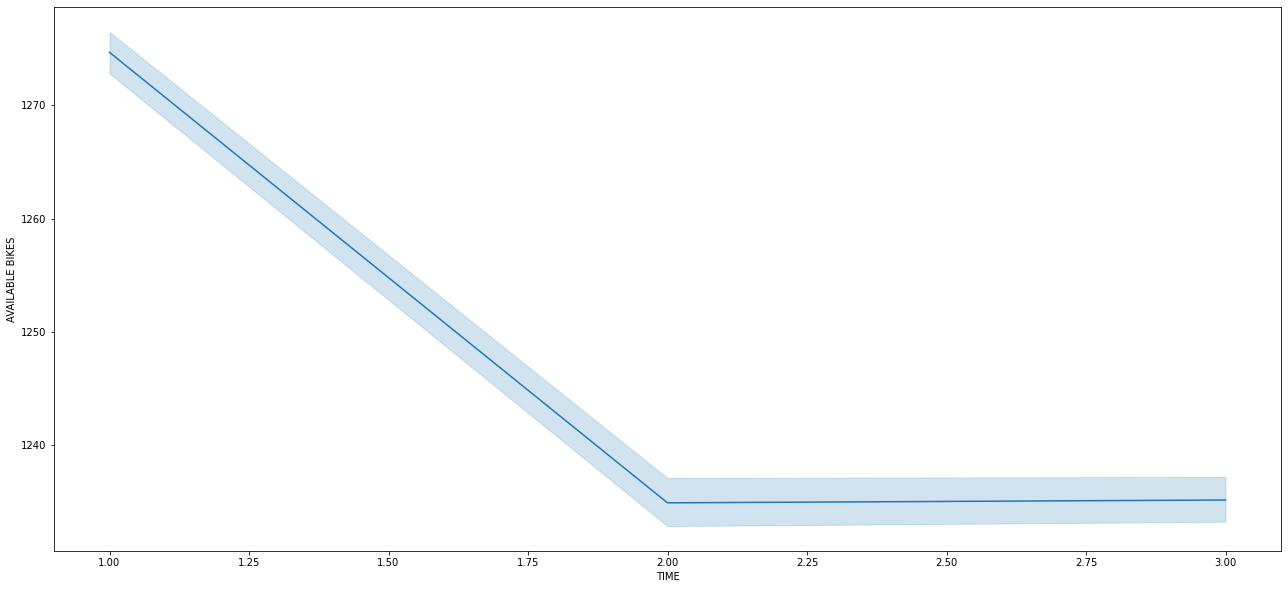

In [130]:
sns.lineplot(x=df_group.index.month, y=X2,data = df_group)

In [10]:
df_group.columns

Index(['STATION ID', 'BIKE STANDS', 'AVAILABLE BIKE STANDS', 'AVAILABLE BIKES',
       'LATITUDE', 'LONGITUDE', 'hour', 'day_of_month', 'day_of_week',
       'month'],
      dtype='object')

#### Converting dataframe in required format

In [11]:
df_model= df_group[['AVAILABLE BIKES' ]].copy()

In [12]:
df_model.reset_index(drop=True, inplace=True)

In [13]:
df_model = df_model.rename(columns={'AVAILABLE BIKES': 'y'})

In [13]:
df_model.head(2)

,y
0,1290
1,1288


### Training and Test Dataset

In [14]:
train_size = int(len(df_model) * 0.9)
test_size = len(df_model) - train_size
train, test = df_model.iloc[0:train_size], df_model.iloc[train_size:len(df_model)]
print(len(train), len(test))

23147 2572


### Normalization

In [15]:
scaler = RobustScaler()
scaler = scaler.fit(train[['y']])
train['y'] = scaler.transform(train[['y']])
test['y'] = scaler.transform(test[['y']])

<ipython-input-15-e502d9c60b47>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y'] = scaler.transform(train[['y']])
<ipython-input-15-e502d9c60b47>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['y'] = scaler.transform(test[['y']])


In [16]:
train[['y']]

,y
0,0.144144
1,0.126126
2,0.153153
3,0.135135
4,0.072072
...,...
23142,0.756757
23143,0.756757
23144,0.765766
23145,0.774775


### Creating sequence with batch of history data

In [16]:
def create_dataset(X, y, steps=1):
    Xs, ys = [], []
    for i in range(len(X) - steps):
        v = X.iloc[i:(i + steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + steps])
    return np.array(Xs), np.array(ys)

In [61]:
steps = 10

# Xtrain is required to have a shape in the format of LSTM input

X_train, y_train = create_dataset(train, train.y, steps)
X_test, y_test = create_dataset(test, test.y, steps)

print(X_train.shape, y_train.shape)

(23137, 10, 1) (23137,)


In [19]:
print(X_test.shape, y_test.shape)

(2562, 10, 1) (2562,)


### Create and fit the LSTM network

In [62]:
model = keras.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.LSTM(units = 32, input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=30, batch_size=50, validation_split=0.1,verbose=2,shuffle = False)

Epoch 1/30
417/417 - 8s - loss: 0.0651 - val_loss: 0.0229
Epoch 2/30
417/417 - 5s - loss: 0.0316 - val_loss: 0.0181
Epoch 3/30
417/417 - 4s - loss: 0.0251 - val_loss: 0.0146
Epoch 4/30
417/417 - 4s - loss: 0.0203 - val_loss: 0.0120
Epoch 5/30
417/417 - 4s - loss: 0.0190 - val_loss: 0.0106
Epoch 6/30
417/417 - 3s - loss: 0.0170 - val_loss: 0.0108
Epoch 7/30
417/417 - 3s - loss: 0.0168 - val_loss: 0.0101
Epoch 8/30
417/417 - 4s - loss: 0.0167 - val_loss: 0.0099
Epoch 9/30
417/417 - 4s - loss: 0.0162 - val_loss: 0.0099
Epoch 10/30
417/417 - 4s - loss: 0.0165 - val_loss: 0.0098
Epoch 11/30
417/417 - 4s - loss: 0.0161 - val_loss: 0.0099
Epoch 12/30
417/417 - 4s - loss: 0.0163 - val_loss: 0.0098
Epoch 13/30
417/417 - 4s - loss: 0.0161 - val_loss: 0.0100
Epoch 14/30
417/417 - 3s - loss: 0.0157 - val_loss: 0.0097
Epoch 15/30
417/417 - 3s - loss: 0.0161 - val_loss: 0.0098
Epoch 16/30
417/417 - 3s - loss: 0.0157 - val_loss: 0.0097
Epoch 17/30
417/417 - 3s - loss: 0.0159 - val_loss: 0.0101
Epoch 

### Plotting the error for training and validation loss

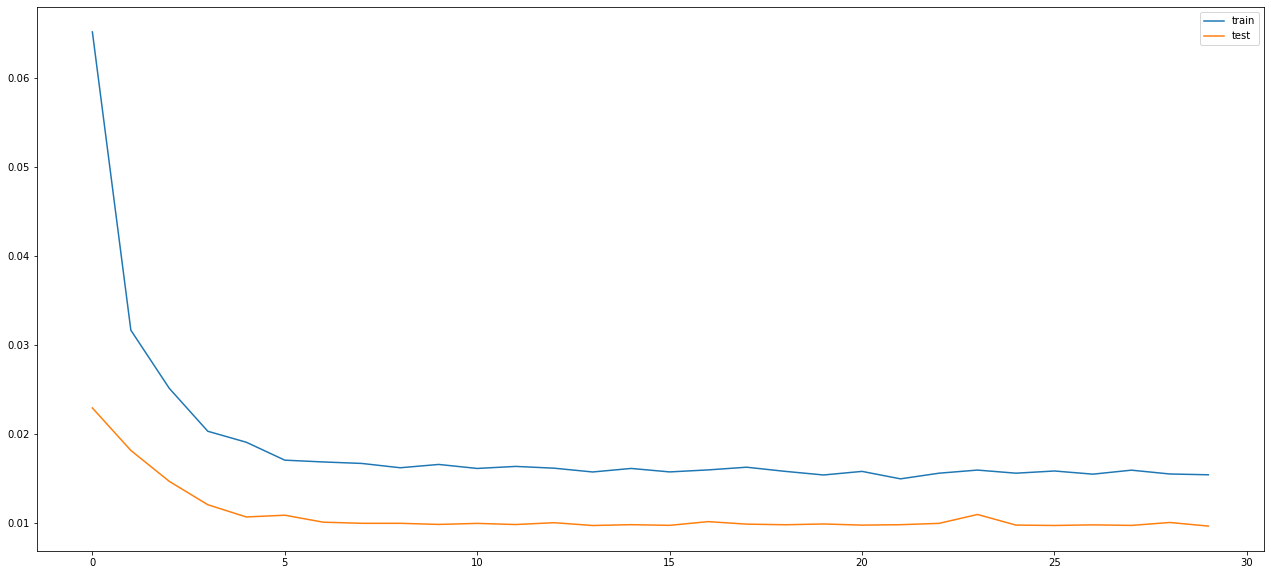

In [63]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

### Prediction

In [64]:
y_pred = model.predict(X_test)

### Denormalizing

In [65]:
y_train_inv = scaler.inverse_transform(y_train.reshape(1, -1))
y_test_inv = scaler.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = scaler.inverse_transform(y_pred)

In [67]:
y1= y_test_inv.flatten()

In [68]:
yhat = y_pred_inv.flatten()

### Baseline Model

In [104]:
y_baseline =[];
for i in range(len(y_train), len(y_train) + len(y_test)):
    b =[]
    b = y1.mean()
    y_baseline.append(b)
    

In [96]:
np.array(y_baseline )

array([1251.0312256, 1251.0312256, 1251.0312256, ..., 1251.0312256,
       1251.0312256, 1251.0312256])

In [86]:
np.arange(len(y_train), len(y_train) + len(y_test))

array([23137, 23138, 23139, ..., 25696, 25697, 25698])

In [45]:
yhat

array([1363.4507, 1363.471 , 1364.4744, ..., 1330.8163, 1339.8699,
       1342.8119], dtype=float32)

### Mean Absolute Error and Mean Absolute percentage error

In [69]:
def mean_absolute_percentage_error(y1, yhat):
    return np.mean(np.abs((y1 - yhat ) / y1)) * 100

In [70]:
mean_absolute_percentage_error(y1, yhat)

0.6158925424376461

In [71]:
mean_absolute_error(yhat,y1)

7.314848948232277

### Plot for predictions on Future Data

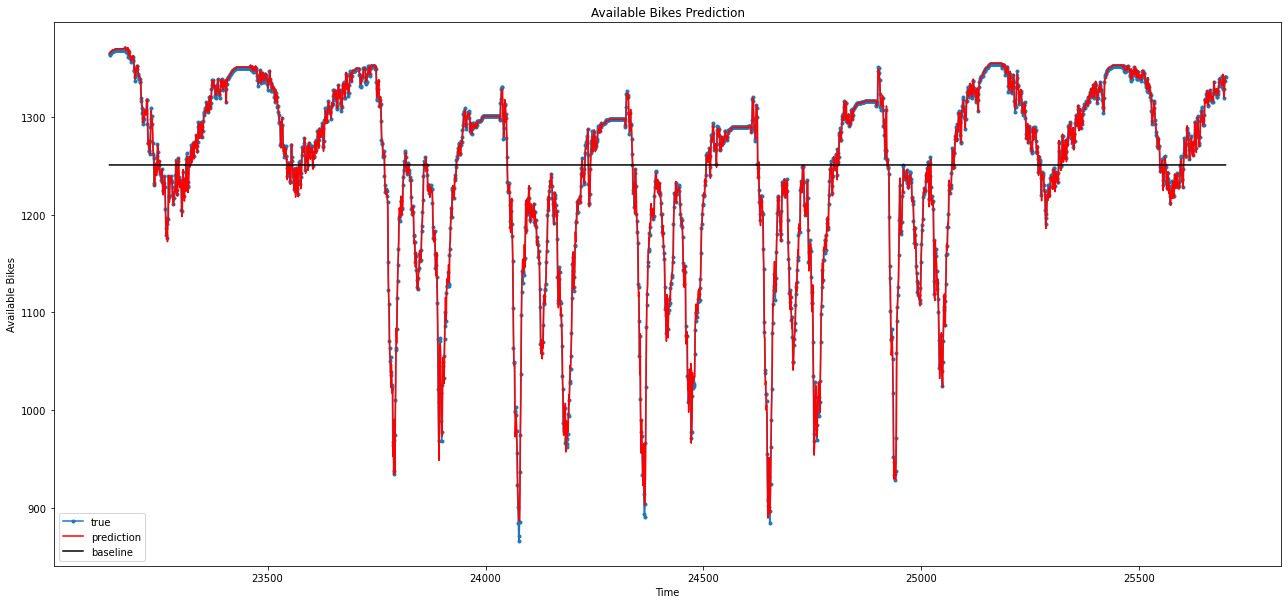

In [105]:
#plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'red', label="prediction")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_baseline, 'black', label="baseline")
plt.ylabel('Available Bikes')
plt.xlabel('Time')
plt.title('Available Bikes Prediction')
plt.legend()
plt.show();

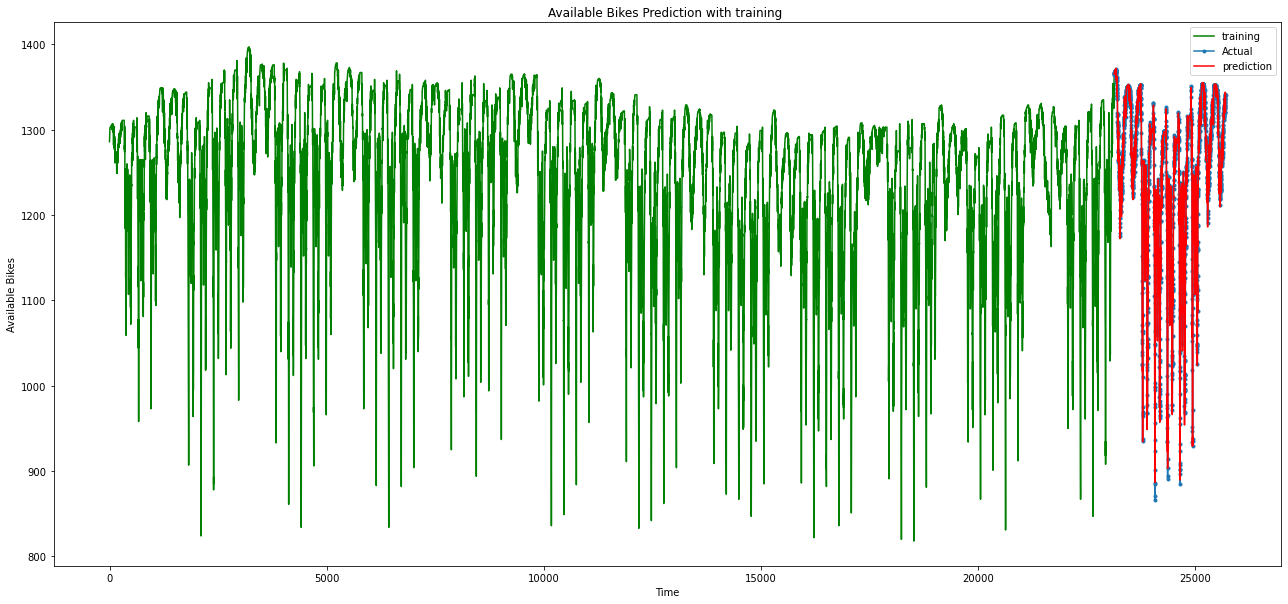

In [106]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="training")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="Actual")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'red', label="prediction")
#plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_baseline, 'black', label="baseline")
plt.ylabel('Available Bikes')
plt.xlabel('Time')
plt.title('Available Bikes Prediction with training ')
plt.legend()
plt.show();

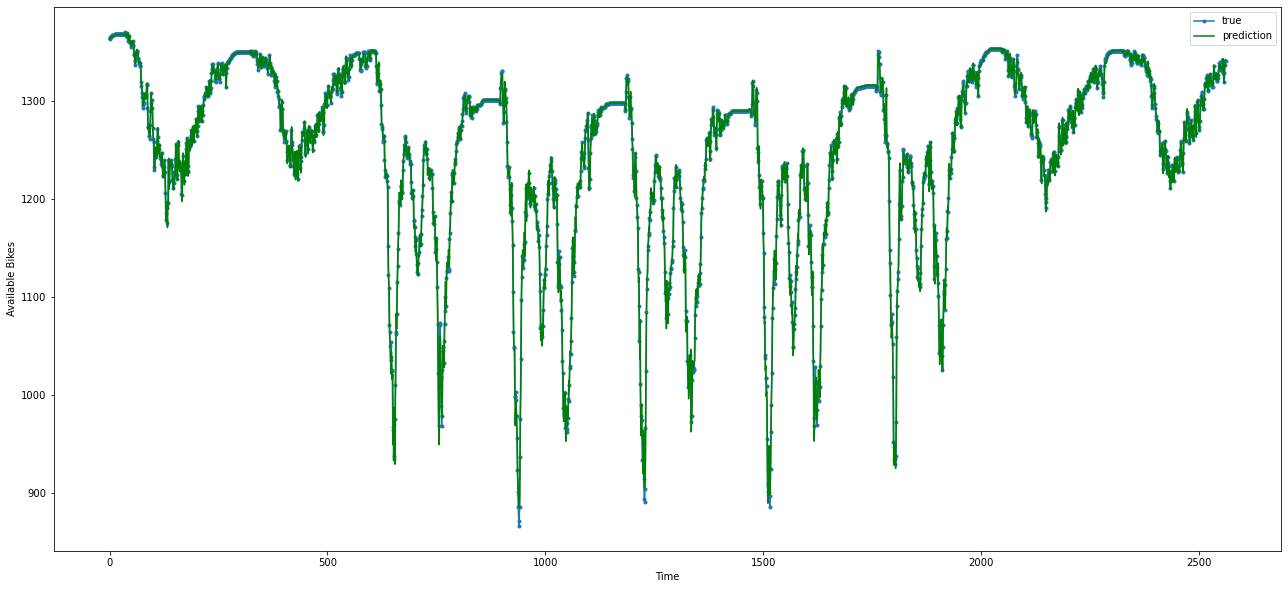

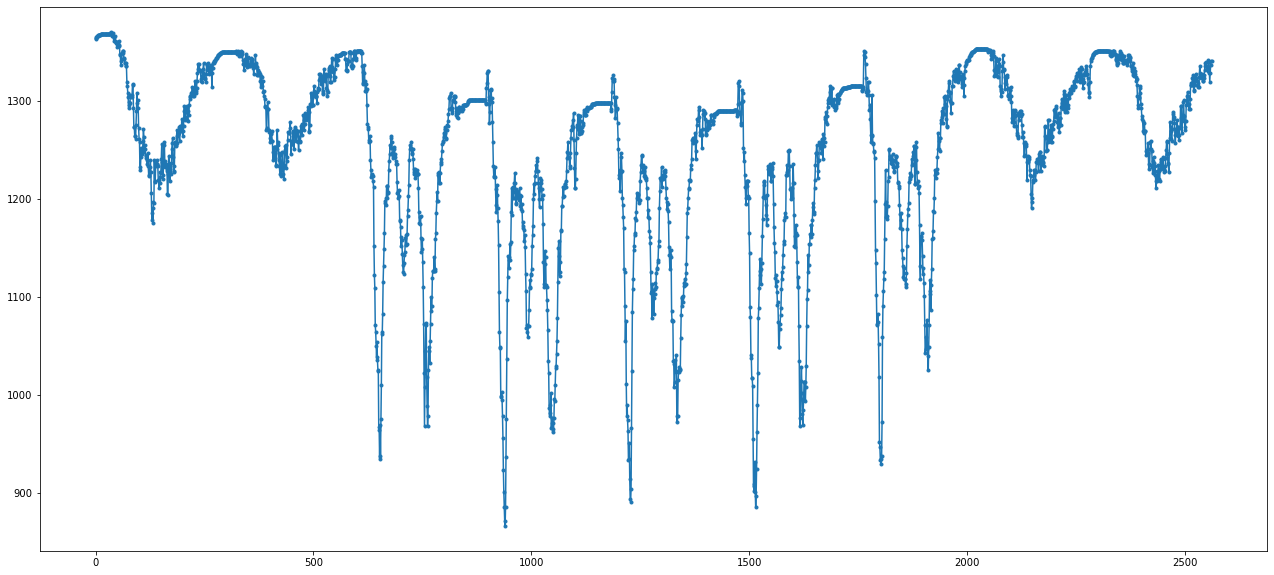

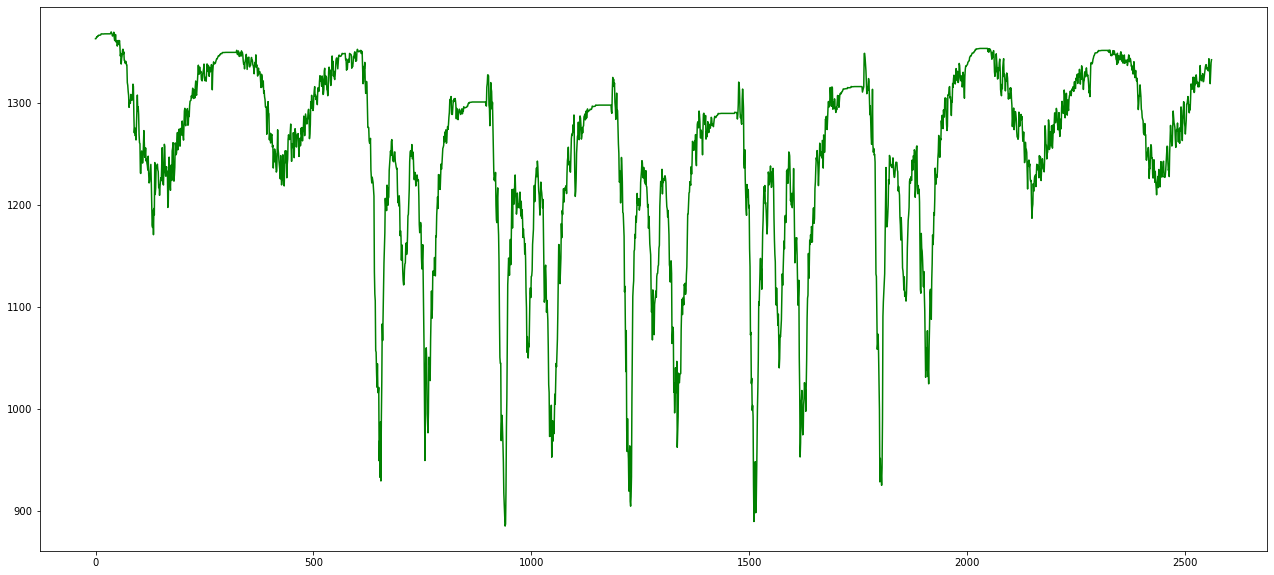

In [43]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'green', label="prediction")
plt.ylabel('Available Bikes')
plt.xlabel('Time')
plt.legend()
plt.show();
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.show()
plt.plot(y_pred_inv.flatten(), 'green', label="prediction")
plt.show()